# Gather

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import ast
import matplotlib.pyplot as plt
%matplotlib inline

#### Download predictions file

In [2]:
Download image-predictions file from Udacity url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

#### Download required columns from Twitter API

In [3]:
Download data from Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


with open('tweet_json.txt', 'w+') as text_file:
    for row in archive.itertuples():
        id = row.tweet_id
        try:
            tweet = api.get_status(id, tweet_mode='extended')._json
        except Exception:
            print(id, ' - Skip!')
            pass
        
        text_file.write(str(tweet) + '\n')
        print(id ,' - Exctracted!')
text_file.close()

In [4]:
# Get data for headers: retweet_count, favorite_count, favorited.
with open('tweet_json.txt', 'r') as f:
    content = f.read().splitlines()

dict_df = {'retweet_count':None, 'favorite_count':None, 'favorited':None}
            
# Greate a dictionary wih headers and each line of file. 
for key in dict_df.keys():
    data_lst = []
    for line in content:
        dict_line = ast.literal_eval(line)
        if key in dict_line.keys():
            data_lst.append(dict_line[key])
        else:
            data_lst.append(None)

    dict_df[key] = data_lst

# Create a DataFrame from these files.
tw_df = pd.DataFrame.from_dict(dict_df)

In [5]:
# Read twitter-archive-enhanced.csv
archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

# Assess

### twitter-archive-enhanced.csv

In [6]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [9]:
archive['timestamp'].sample(10)

237     2017-03-29 18:43:12 +0000
2084    2015-11-29 03:33:17 +0000
1335    2016-03-03 03:51:44 +0000
421     2017-01-19 01:04:45 +0000
2253    2015-11-20 19:55:30 +0000
65      2017-06-27 00:10:17 +0000
382     2017-02-02 18:52:38 +0000
1813    2015-12-15 14:50:49 +0000
2284    2015-11-19 04:05:59 +0000
775     2016-09-14 23:30:38 +0000
Name: timestamp, dtype: object

In [10]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    print(archive['text'].sample(10))

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                         
829     RT @dog_rates: When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https:/…
1478    Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx 
74      RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…
1499    This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N 
742     RT @Patreon: Well. @dog_rates is on Patreon. \n\n12/10. \n\nhttps://t.co/rnKvzt6RJs https://t.co/v4e2ywe8iO                                 
1329    Meet Max. He's a Fallopian Cephalopuff. Eyes are magical af. Lil dandruff problem. No big deal 10/

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    print(archive['expanded_urls'].sample(10))

1136    https://twitter.com/dog_rates/status/728387165835677696/photo/1                                                                                                                                  
22      https://twitter.com/dog_rates/status/887517139158093824/video/1                                                                                                                                  
1143    https://twitter.com/dog_rates/status/727314416056803329/photo/1,https://twitter.com/dog_rates/status/727314416056803329/photo/1,https://twitter.com/dog_rates/status/727314416056803329/photo/1  
185     NaN                                                                                                                                                                                              
1214    https://twitter.com/dog_rates/status/715200624753819648/photo/1                                                                                                                         

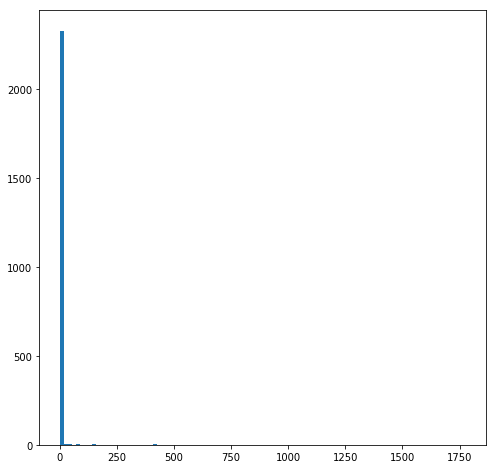

In [13]:
plt.figure(figsize=(8, 8))
plt.hist(archive.rating_numerator, bins=100)
plt.show();

In [14]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### image-predictions.tsv

In [18]:
predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
predictions['tweet_id'].duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(predictions['jpg_url'].sample(10))

970     https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg
394     https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg
1813    https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg
1245    https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg
256     https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg
1593    https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg
2019    https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg
292     https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg
899     https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg
1028    https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg
Name: jpg_url, dtype: object


In [22]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [23]:
predictions['p1'].sample(20)

106                   jigsaw_puzzle
1452                     toy_poodle
170                            lynx
1357                        axolotl
777                          collie
1428                         basset
630              Labrador_retriever
485     West_Highland_white_terrier
416                          collie
84               Labrador_retriever
1620                           chow
1848                          swing
1220                   bull_mastiff
1079               Brittany_spaniel
1805                       Pembroke
1381               golden_retriever
124                            chow
1386                        redbone
1149                       Pembroke
878                             pug
Name: p1, dtype: object

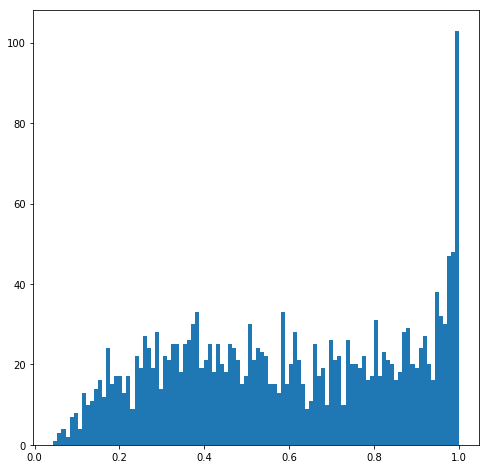

In [24]:
plt.figure(figsize=(8, 8))
plt.hist(predictions.p1_conf, bins=100)
plt.show();

In [25]:
predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
predictions['p2'].sample(20)

1485               golden_retriever
1203                        redbone
493       Staffordshire_bullterrier
397                          beagle
1577                       Pembroke
184                  French_bulldog
533                      guinea_pig
912                         redbone
1815                         kelpie
484                        terrapin
1507                     sea_urchin
1197             Norwegian_elkhound
1701                   Afghan_hound
373     West_Highland_white_terrier
1974                       Cardigan
1402               golden_retriever
1889                 Siberian_husky
47               standard_schnauzer
1461                            pug
1223                        Samoyed
Name: p2, dtype: object

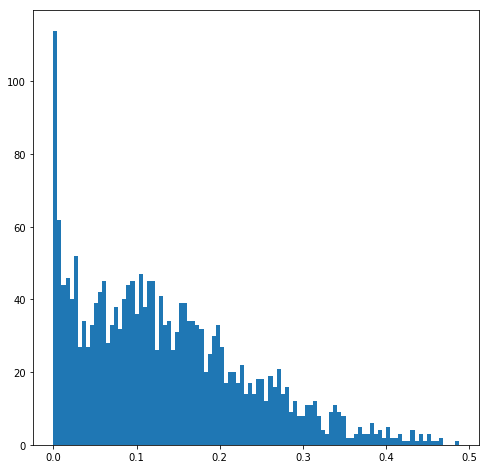

In [27]:
plt.figure(figsize=(8, 8))
plt.hist(predictions.p2_conf, bins=100)
plt.show();

In [28]:
predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [29]:
predictions['p3'].sample(20)

2022                  ibex
1560              Pembroke
691                    hog
1800              Leonberg
553          parallel_bars
1417            Eskimo_dog
1253         mountain_tent
1932           Persian_cat
267          Border_collie
551               Pekinese
634             schipperke
434                sandbar
81        Lakeland_terrier
111             Eskimo_dog
1050          Irish_setter
1353                maraca
1726            Rottweiler
1042    Labrador_retriever
1485                collie
1361                 boxer
Name: p3, dtype: object

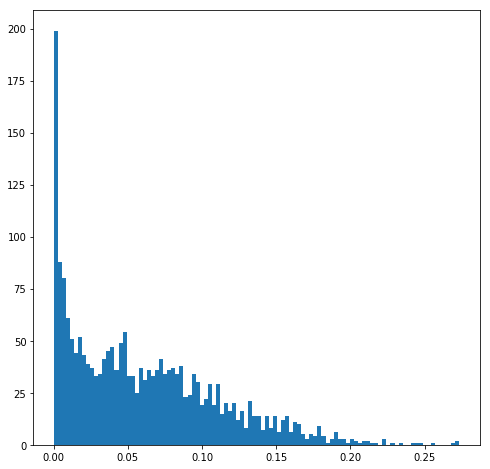

In [30]:
plt.figure(figsize=(8, 8))
plt.hist(predictions.p3_conf, bins=100)
plt.show();

In [31]:
predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Twitter Dataframe

In [32]:
tw_df.head()

,retweet_count,favorite_count,favorited
0,8276,37900,False
1,6115,32553,False
2,4051,24513,False
3,8420,41240,False
4,9120,39422,False


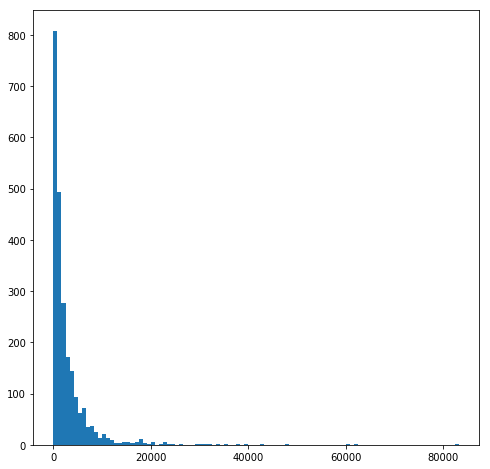

In [33]:
plt.figure(figsize=(8, 8))
plt.hist(tw_df.retweet_count, bins=100)
plt.show();

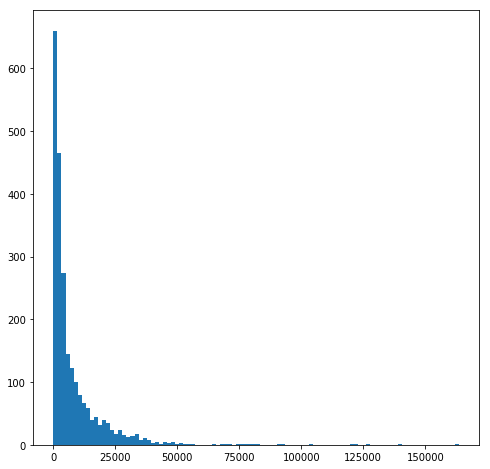

In [34]:
plt.figure(figsize=(8, 8))
plt.hist(tw_df.favorite_count, bins=100)
plt.show();

In [35]:
tw_df.favorited.value_counts()

False    2356
Name: favorited, dtype: int64

**Tidiness issues:** 
 1. Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.
 2. **`doggo, floofer, pupper, puppo`** columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

**Quality issues:**  
 1. The output contains rows that doesn't have values from neural network algorithm.
 2. Filter tweets to orginal ones (no retweets). Delete retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.
 3. **`rating denominator`**: remove rows where rating denominator is lower than 10..
 3. **`source`** : replace values with more meaningfull ones.
 4. **`p1_dog, p2_dog, p3_dog`**: The data type of these columns should be changed to boolean values ir order to interpret values correctly.
 5. **`timestamp`**: filter timestamp column to date and time information only.
 7. Extract @ links to separate column for easy data filtering.
 8. Extract # links to separate column for easy data filtering.
 1. **`p1, p2, p3`**: make all values uppercase in columns. 
 2. **`text`**: clean from multiple spaces and new line(\n) signs.

# Clean

In [36]:
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tw_df_clean = tw_df.copy()

## Tidiness issues

### Issue 1    
**`doggo, floofer, pupper, puppo`** columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

### Code

In [37]:
archive_clean['dog_stage'] = archive_clean['doggo'].str.cat(archive_clean[['floofer', 'pupper', 'puppo']])

archive_clean['dog_stage'] = archive_clean.dog_stage.str.replace('None', '')
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [38]:
archive_clean.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Issue 2
Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.

### Code

In [40]:
df_clean = pd.merge(archive_clean, predictions, how='outer', on=['tweet_id'])
df_clean = df_clean.join(tw_df['retweet_count'])
df_clean = df_clean.join(tw_df['favorite_count'])
df_clean = df_clean.join(tw_df['favorited'])

### Test

In [41]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,favorited
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8276,37900,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6115,32553,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4051,24513,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8420,41240,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9120,39422,False


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

## Quality issues

### Issue 1    
The output contains rows that doesn't have values from neural network algorithm.

### Code

In [43]:
df_clean = df_clean[df_clean.p1.notnull()]

### Test

In [44]:
len(df_clean.query('p1 == None'))

0

### Issue 2
Filter tweets to orginal ones (no retweets). Delete retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

### Code

In [45]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                306 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                    

### Issue 3    
**`rating denominator`**: remove rows where rating denominator is lower than 10.

### Code

In [47]:
df_clean = df_clean[df_clean.rating_denominator >= 10]

### Test

In [48]:
df_clean.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

### Issue 4
**`Source`** : replace values with more meaningfull ones.

### Code

In [49]:
data = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter iPhone app', 
        '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine.co',
        '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
        '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}
df_clean['source'] = df_clean['source'].map(data)

### Test

In [50]:
df_clean.source.value_counts()

Twitter iPhone app    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Issue 5 
**`p1_dog, p2_dog, p3_dog`**: data type of these columns should be changed to boolean values ir order to interpret values correctly.

### Code

In [51]:
df_clean['p1_dog'] = df_clean['p1_dog'].astype('bool')
df_clean['p2_dog'] = df_clean['p2_dog'].astype('bool')
df_clean['p3_dog'] = df_clean['p3_dog'].astype('bool')

### Test

In [52]:
df_clean[['p1_dog', 'p2_dog', 'p3_dog']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 3 columns):
p1_dog    1992 non-null bool
p2_dog    1992 non-null bool
p3_dog    1992 non-null bool
dtypes: bool(3)
memory usage: 21.4 KB


### Issue 6  
**`timestamp`**: filter timestamp column to date and time information only.

### Code

In [53]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

### Test

In [54]:
df_clean['timestamp'].head(10)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
5   2017-07-29 00:08:17
6   2017-07-28 16:27:12
7   2017-07-28 00:22:40
8   2017-07-27 16:25:51
9   2017-07-26 15:59:51
Name: timestamp, dtype: datetime64[ns]

### Issue 7 
 Extract @ links to separate column for easy data filtering.

### Code

In [55]:
rx = r'(\@\w+)'
df_clean['twitter_link'] = df_clean.text.str.findall(rx).apply(' '.join)

### Test

In [56]:
df_clean[['twitter_link']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 1 columns):
twitter_link    1992 non-null object
dtypes: object(1)
memory usage: 31.1+ KB


### Issue 8 
 Extract # links to separate column for easy data filtering.

### Code

In [57]:
rx = '(#\S+)'
df_clean['hash'] = df_clean.text.str.findall(rx).apply(' '.join)

### Test

In [58]:
df_clean[['hash']].info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 1 columns):
hash    1992 non-null object
dtypes: object(1)
memory usage: 31.1+ KB


### Issue 9 
**`p1, p2, p3`**: make all values uppercase in columns.

### Code

In [59]:
df_clean['p1'] = df_clean.p1.str.capitalize()
df_clean['p2'] = df_clean.p1.str.capitalize()
df_clean['p3'] = df_clean.p1.str.capitalize()

### Test

In [60]:
df_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
1968,Samoyed,Samoyed,Samoyed
163,Lakeside,Lakeside,Lakeside
2175,Minivan,Minivan,Minivan
1606,Sliding_door,Sliding_door,Sliding_door
1235,Labrador_retriever,Labrador_retriever,Labrador_retriever
156,Cardigan,Cardigan,Cardigan
2203,Vacuum,Vacuum,Vacuum
2007,Chihuahua,Chihuahua,Chihuahua
1348,Teddy,Teddy,Teddy
2266,Golden_retriever,Golden_retriever,Golden_retriever


### Issue 10
**`text`**: clean from multiple spaces and new line(\n) signs.

### Code

In [61]:
df_clean['text'] = df_clean['text'].str.replace(pat='\n', repl=' ', regex=True)
df_ob = df_clean.select_dtypes(['object'])
df_clean[df_ob.columns] = df_ob.apply(lambda x: x.str.strip())

### Test

In [62]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    print(df_clean['text'].sample(10))

2141    This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK               
642     This is Maude. She's the h*ckin happiest wasp you've ever seen. 10/10 would pet with caution https://t.co/etL8FHBrh8                        
1093    Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC                                   
1202    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                       
940     Say hello to Tayzie. She's a Barbadian Bugaboop. Seems quite social. A rare quality for a Bugaboop. 10/10 petable af https://t.co/6qF5YZx6OV
2348    Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt
1919    This is Bob. He's a Juniper Fitzsimmons. His body is 2, but his face is 85. Always looks miserable

# Observations

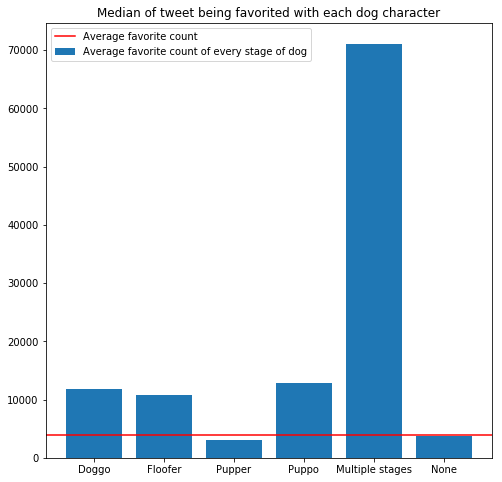

In [63]:
nr_doggo = df_clean.loc[df_clean['dog_stage'] == 'doggo']['favorite_count'].median()
nr_floofer = df_clean.loc[df_clean['dog_stage'] == 'floofer']['favorite_count'].median()
nr_pupper = df_clean.loc[df_clean['dog_stage'] == 'pupper']['favorite_count'].median()
nr_puppo = df_clean.loc[df_clean['dog_stage'] == 'puppo']['favorite_count'].median()
nr_dog_flo = df_clean.loc[df_clean['dog_stage'] == 'doggo,floofer']['favorite_count'].median()
nr_dog_pupper = df_clean.loc[df_clean['dog_stage'] == 'doggo,pupper']['favorite_count'].median()
nr_dog_puppo = df_clean.loc[df_clean['dog_stage'] == 'doggo,puppo']['favorite_count'].median()
nr_none = df_clean.loc[df_clean['dog_stage'].isnull()]['favorite_count'].median()

labels = ('Doggo', 'Floofer', 'Pupper', 'Puppo', 'Multiple stages', 'None')
data = [nr_doggo, nr_floofer, nr_pupper, nr_puppo, nr_dog_flo + nr_dog_pupper + nr_dog_puppo, nr_none]

plt.figure(figsize=(8, 8))
plt.bar(labels, data, label ='Average favorite count of every stage of dog');
plt.axhline(y=df_clean['favorite_count'].median(), color='red', label ='Average favorite count')
plt.title('Median of tweet being favorited with each dog character')
plt.legend()
plt.show();

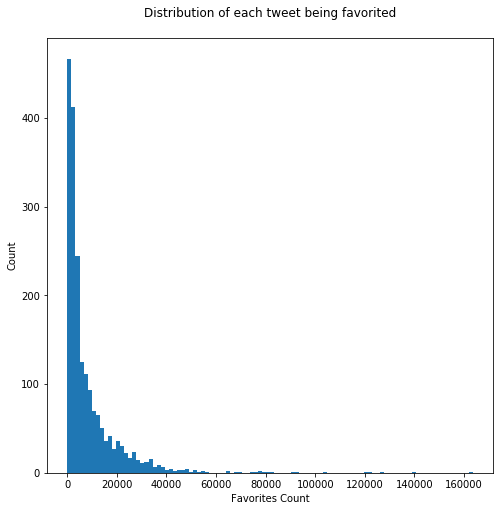

In [64]:
plt.figure(figsize=(8, 8))
plt.hist(df_clean.favorite_count, bins=100)
plt.xlabel('Favorites Count')
plt.ylabel('Count')
plt.title('Distribution of each tweet being favorited\n')
plt.show()

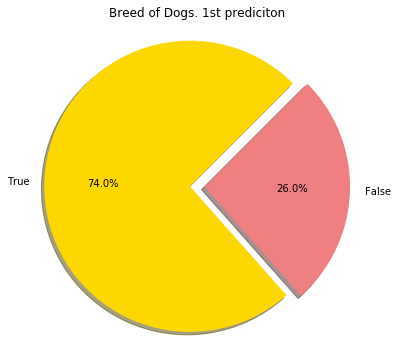

In [65]:
labels = ('True', 'False')
data = [df_clean.p1_dog.value_counts()[1], df_clean.p1_dog.value_counts()[0]]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)
 
plt.figure(figsize=(6, 6))
plt.pie(data, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)
 
plt.axis('equal')
plt.title('Breed of Dogs. 1st prediciton')
plt.show();

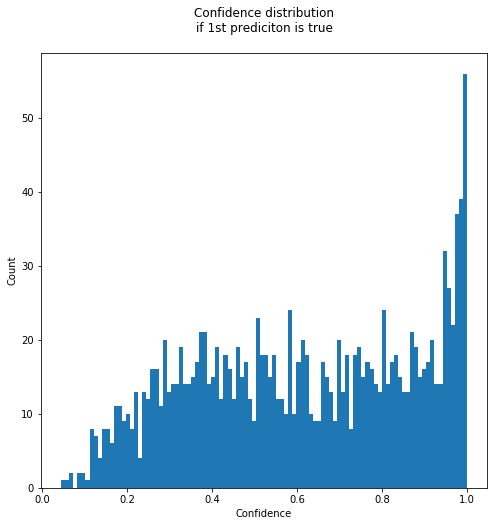

In [66]:
plt.figure(figsize=(8, 8))
dfp1 = df_clean.query('p1_dog == True')
plt.hist(dfp1.p1_conf, bins=100)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Confidence distribution\nif 1st prediciton is true\n')
plt.show()

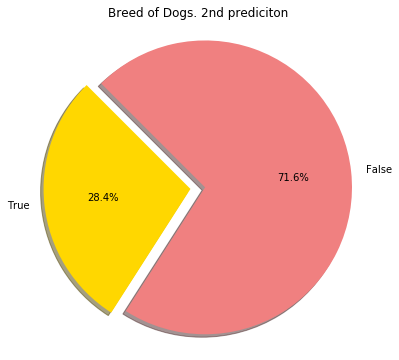

In [67]:
df_p2 = df_clean.query('p1_dog == False')
labels = ('True', 'False')
data = [df_p2.p2_dog.value_counts()[1], df_p2.p2_dog.value_counts()[0]]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
plt.figure(figsize=(6, 6))
plt.pie(data, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=135)
plt.title('Breed of Dogs. 2nd prediciton')
plt.axis('equal');

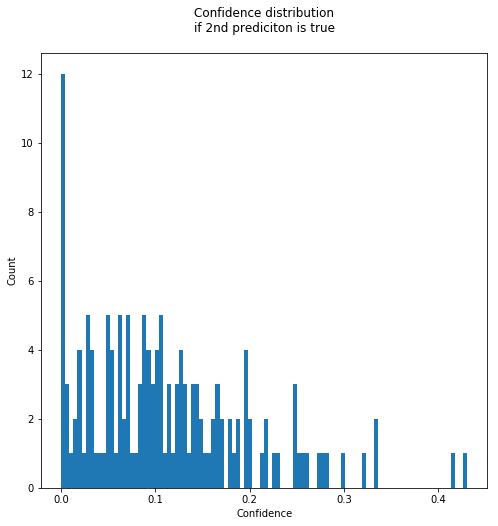

In [68]:
plt.figure(figsize=(8, 8))
dfp2 = df_p2.query('p2_dog == True')
plt.hist(dfp2.p2_conf, bins=100)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Confidence distribution\nif 2nd prediciton is true\n')
plt.show()

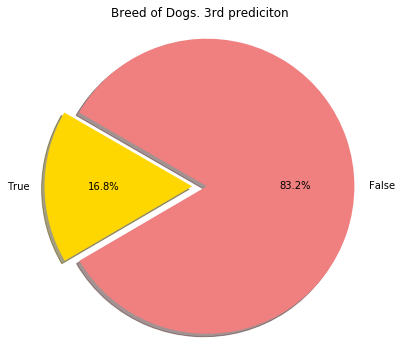

In [69]:
df_p3 = df_p2.query('p2_dog == False')
labels = ('True', 'False')
data = [df_p3.p3_dog.value_counts()[1], df_p3.p3_dog.value_counts()[0]]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
plt.figure(figsize=(6, 6))
plt.pie(data, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.title('Breed of Dogs. 3rd prediciton')
plt.axis('equal');

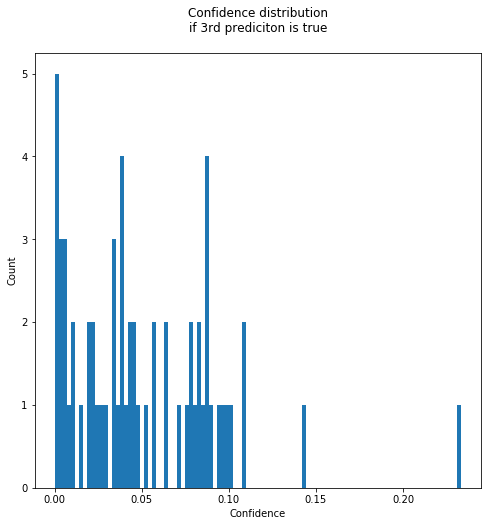

In [70]:
plt.figure(figsize=(8, 8))
dfp3 = df_p3.query('p3_dog == True')
plt.hist(dfp3.p3_conf, bins=100)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Confidence distribution\nif 3rd prediciton is true\n')
plt.show()

## Output

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
dog_stage                306 non-null object
jpg_url                  1992 non-null object
img_num                  1992 non-null float64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992 non-null float64
p2_dog                   1992 non-null bool
p3                

In [72]:
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False, sep=';', quotechar='"')